In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from vae.datasets import VolSurfaceDataSetDict, VolSurfaceExFeatsDataSet
from vae.cvae import CVAE
from vae.cvae_with_mem import CVAEMem
from vae.utils import *
from eval_scripts.eval_utils import *
from eval_scripts.eval_single_day import *
from eval_scripts.eval_multi_day import *

In [2]:
set_seeds(0)
torch.set_default_dtype(torch.float64)

In [14]:
seq_len = 5
ctx_len = seq_len - 1
num_epochs = 1000
model_data = torch.load("test/test_spx/simple/dense_mem_spx.pt")

In [18]:
data = np.load("data/vol_surface_with_ret.npz")
vol_surf_data = data["surface"]
ret_data = data["ret"]
train_ret = DataLoader(VolSurfaceExFeatsDataSet(vol_surf_data[:4000], ret_data[:4000], seq_len), shuffle=True, batch_size=64)
valid_ret = DataLoader(VolSurfaceExFeatsDataSet(vol_surf_data[4000:5000], ret_data[4000:5000], seq_len), shuffle=True, batch_size=16)
test_ret = DataLoader(VolSurfaceExFeatsDataSet(vol_surf_data[5000:], ret_data[5000:], seq_len), shuffle=True, batch_size=16)

use_ex_feats is:  False


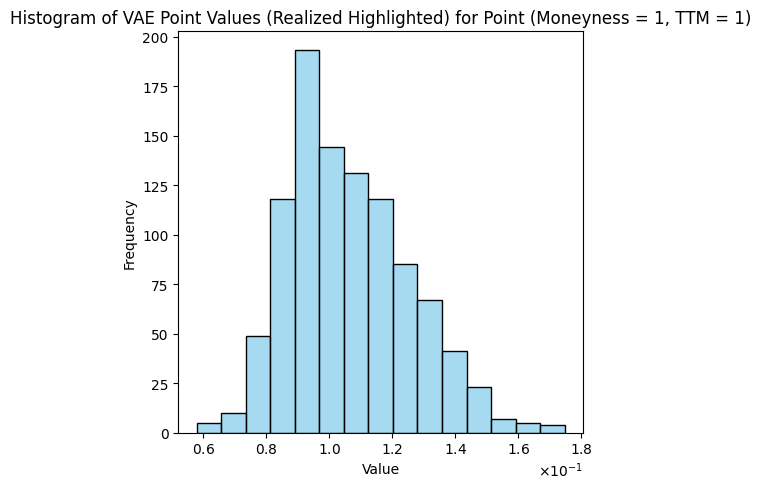

ValueError: not enough values to unpack (expected 4, got 3)

In [19]:
vae_surf, vae_surf_dist, realized_surf_point, vae_ex_feat = generate_multiple_surfaces_distributions(
    model_data = model_data,
    ex_data = ret_data, vol_surface_data = vol_surf_data, 
    day = 2000, row = 3,col = 2, 
    num_vaes = 1000, model_type = CVAEMem, check_ex_feats=True)

use_ex_feats is:  True


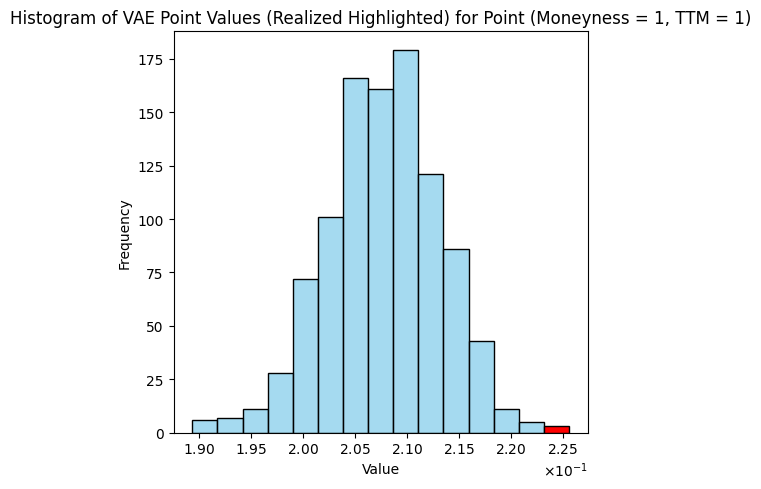

In [6]:
vae_surf, vae_surf_dist, realized_surf_point = generate_multiple_surfaces_distributions(
    model_data = model_data,
    ex_data = ret_data, vol_surface_data = vol_surf_data, 
    day = 2000, row = 3,col = 2, 
    num_vaes = 1000, model_type = CVAEMem, check_ex_feats=False)

use_ex_feats is:  True


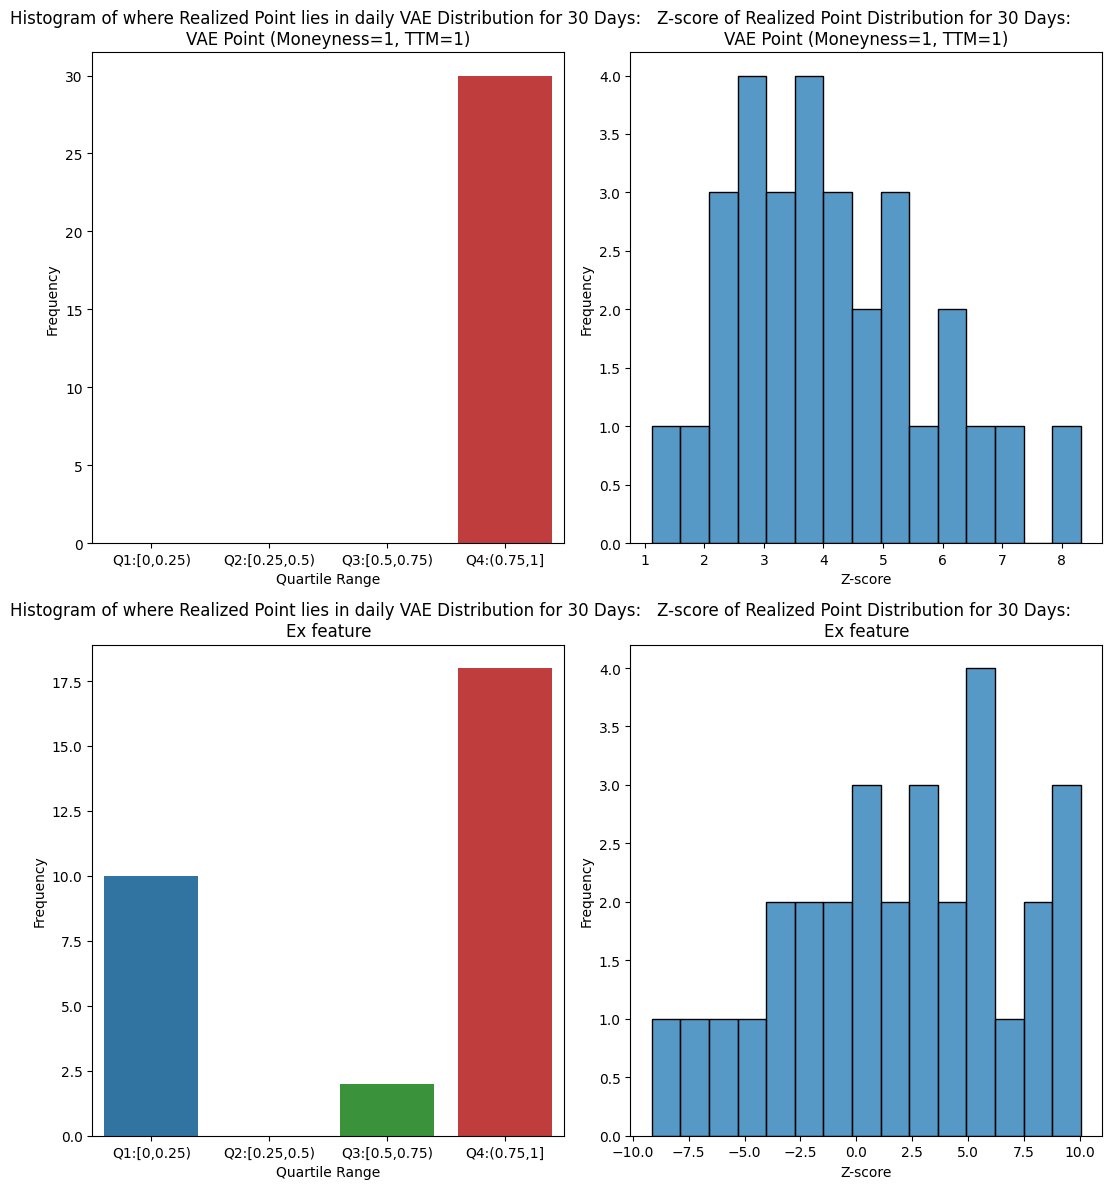

In [7]:
_ = generate_multiple_surfaces_day_evolution(
    model_data = model_data,
    ex_data = ret_data, vol_surface_data = vol_surf_data, 
    start_day=2000, days_to_generate=30, row = 3,col = 2, 
    num_vaes = 1000, model_type = CVAEMem, check_ex_feats=True)

use_ex_feats is:  True


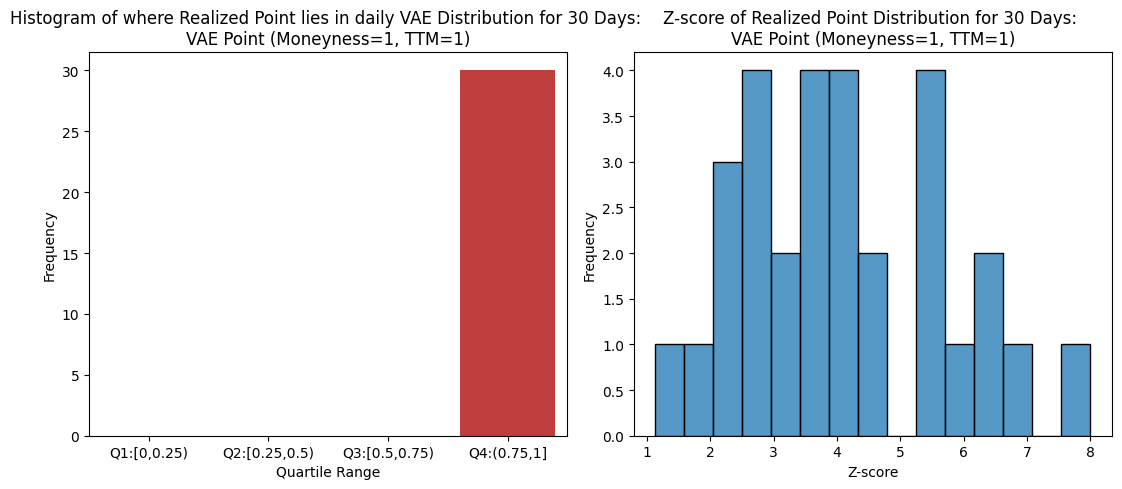

In [8]:
_ =generate_multiple_surfaces_day_evolution(
    model_data = model_data,
    ex_data = ret_data, vol_surface_data = vol_surf_data, 
    start_day=2000, days_to_generate=30, row = 3,col = 2, 
    num_vaes = 1000, model_type = CVAEMem, check_ex_feats=False)

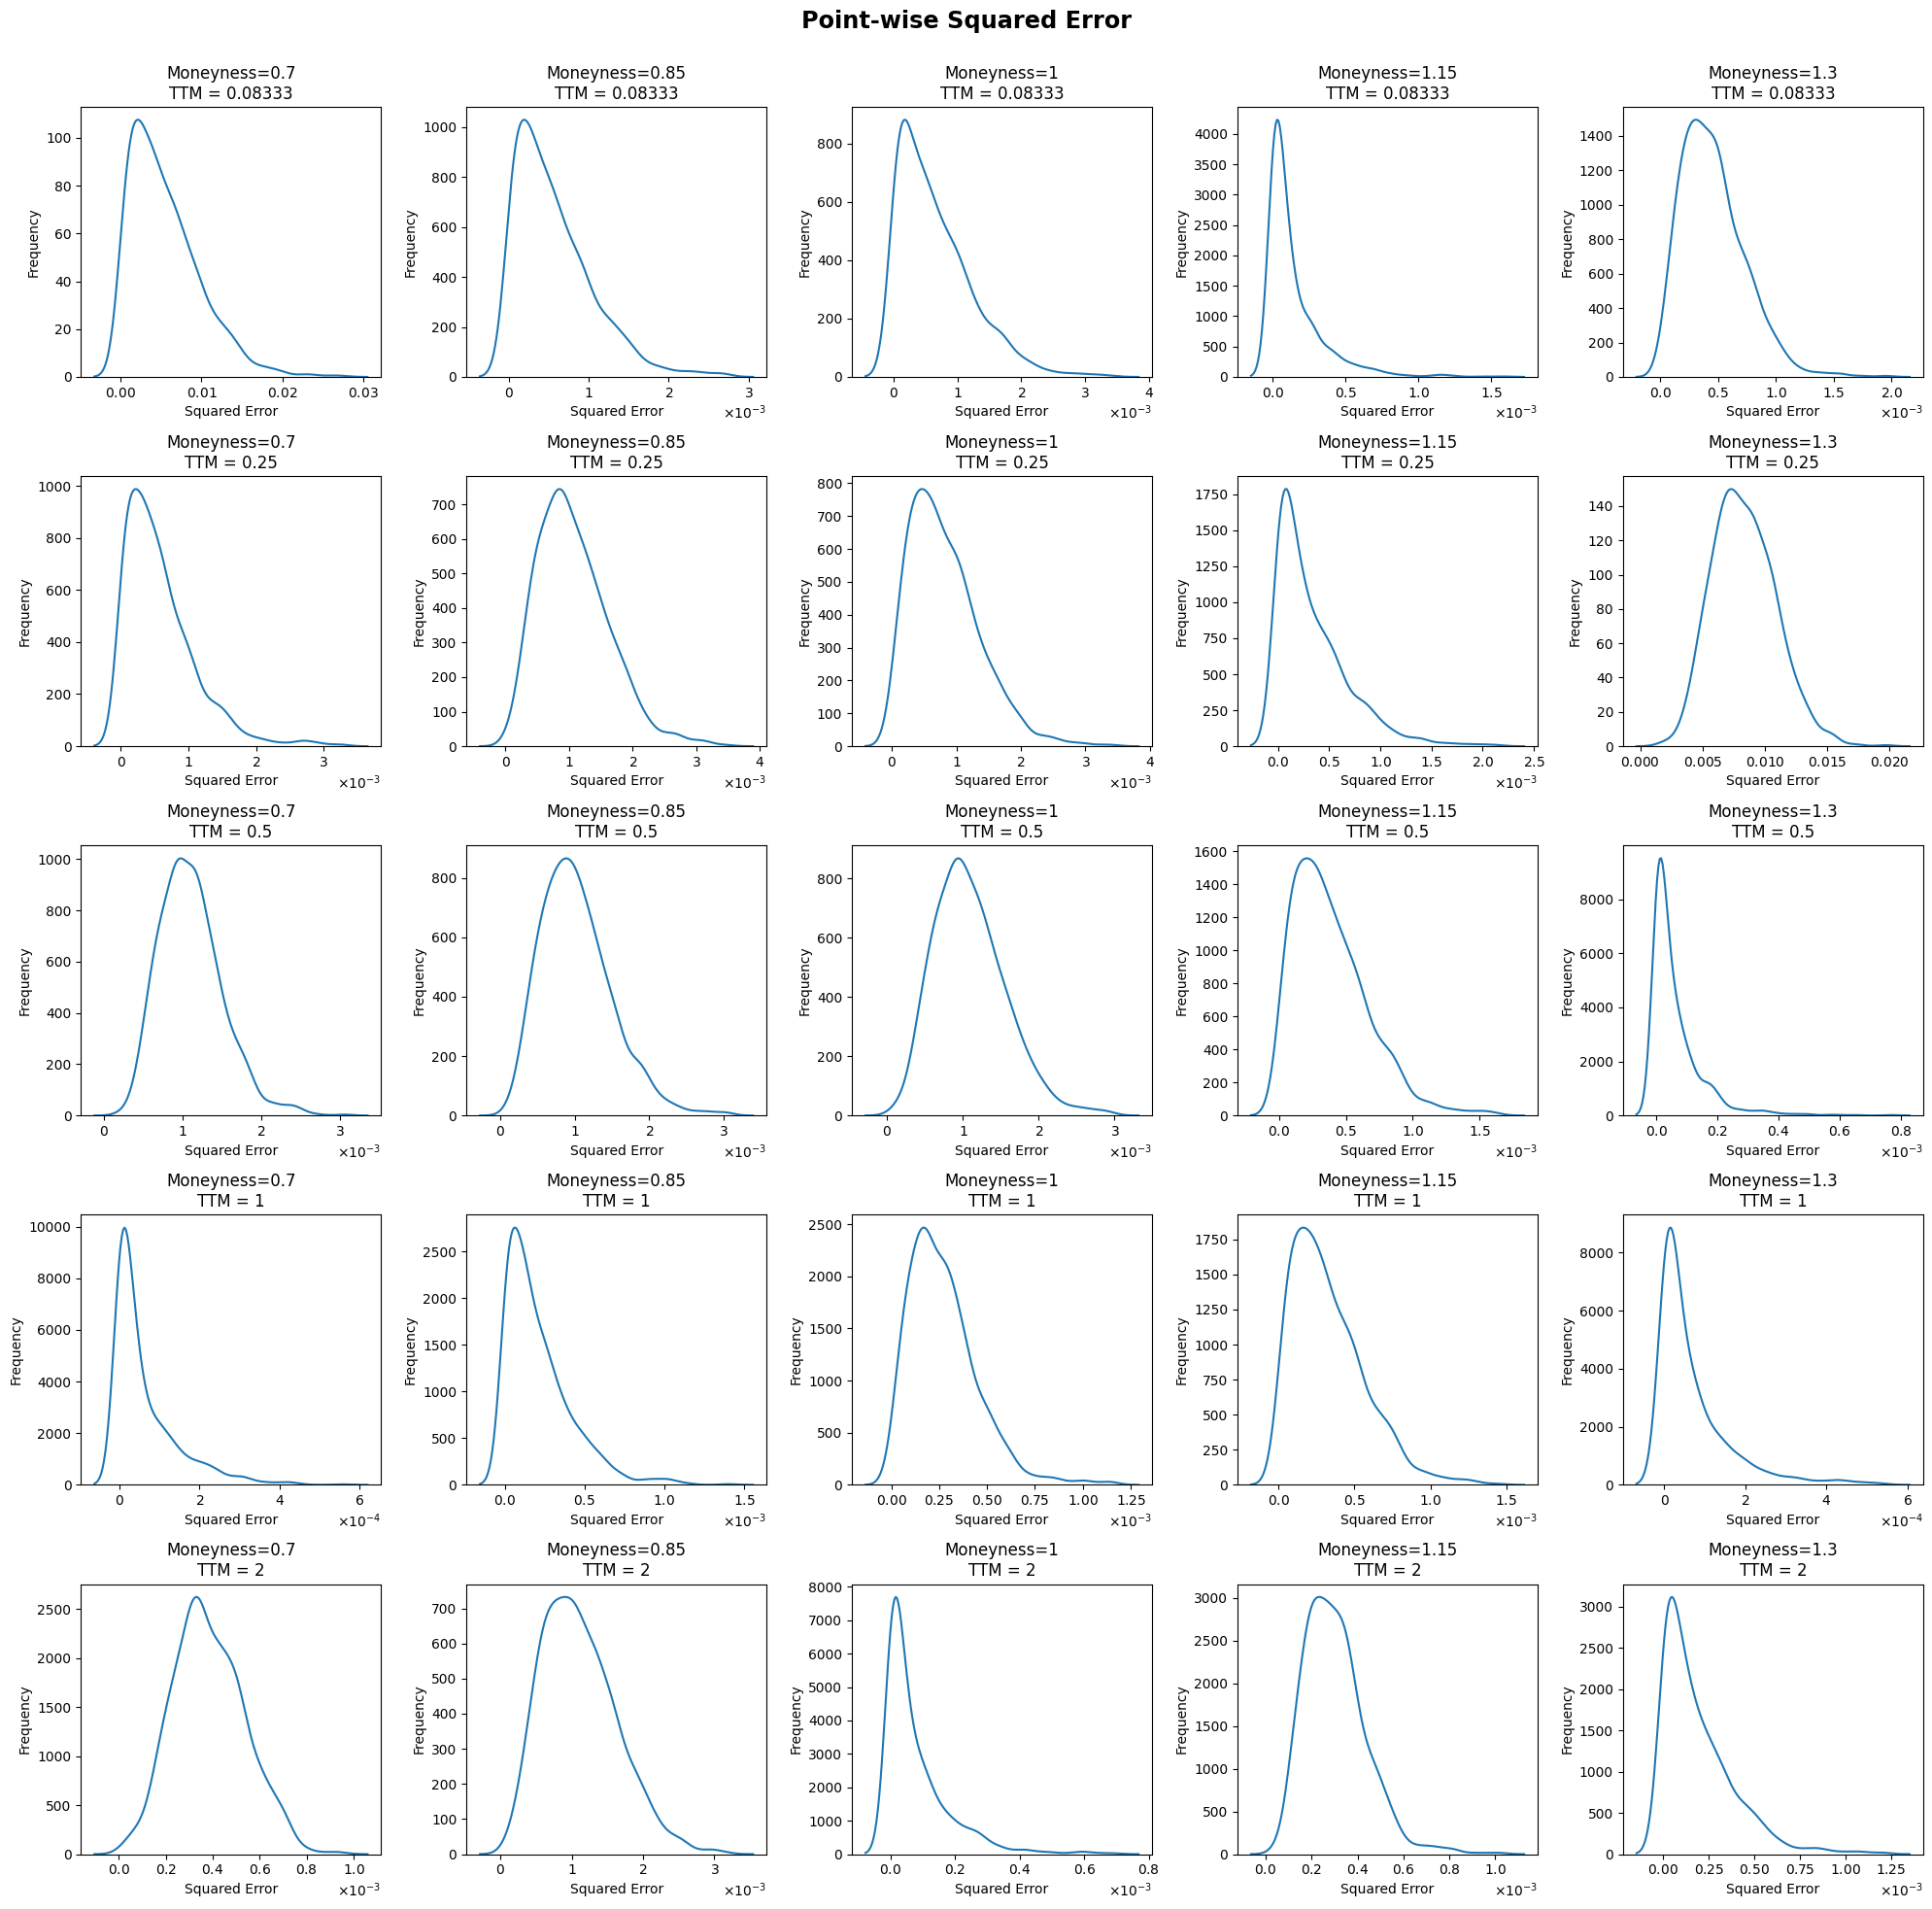

In [9]:
compute_pointwise_error_histogram(vol_surf_data[2000], vae_surf)

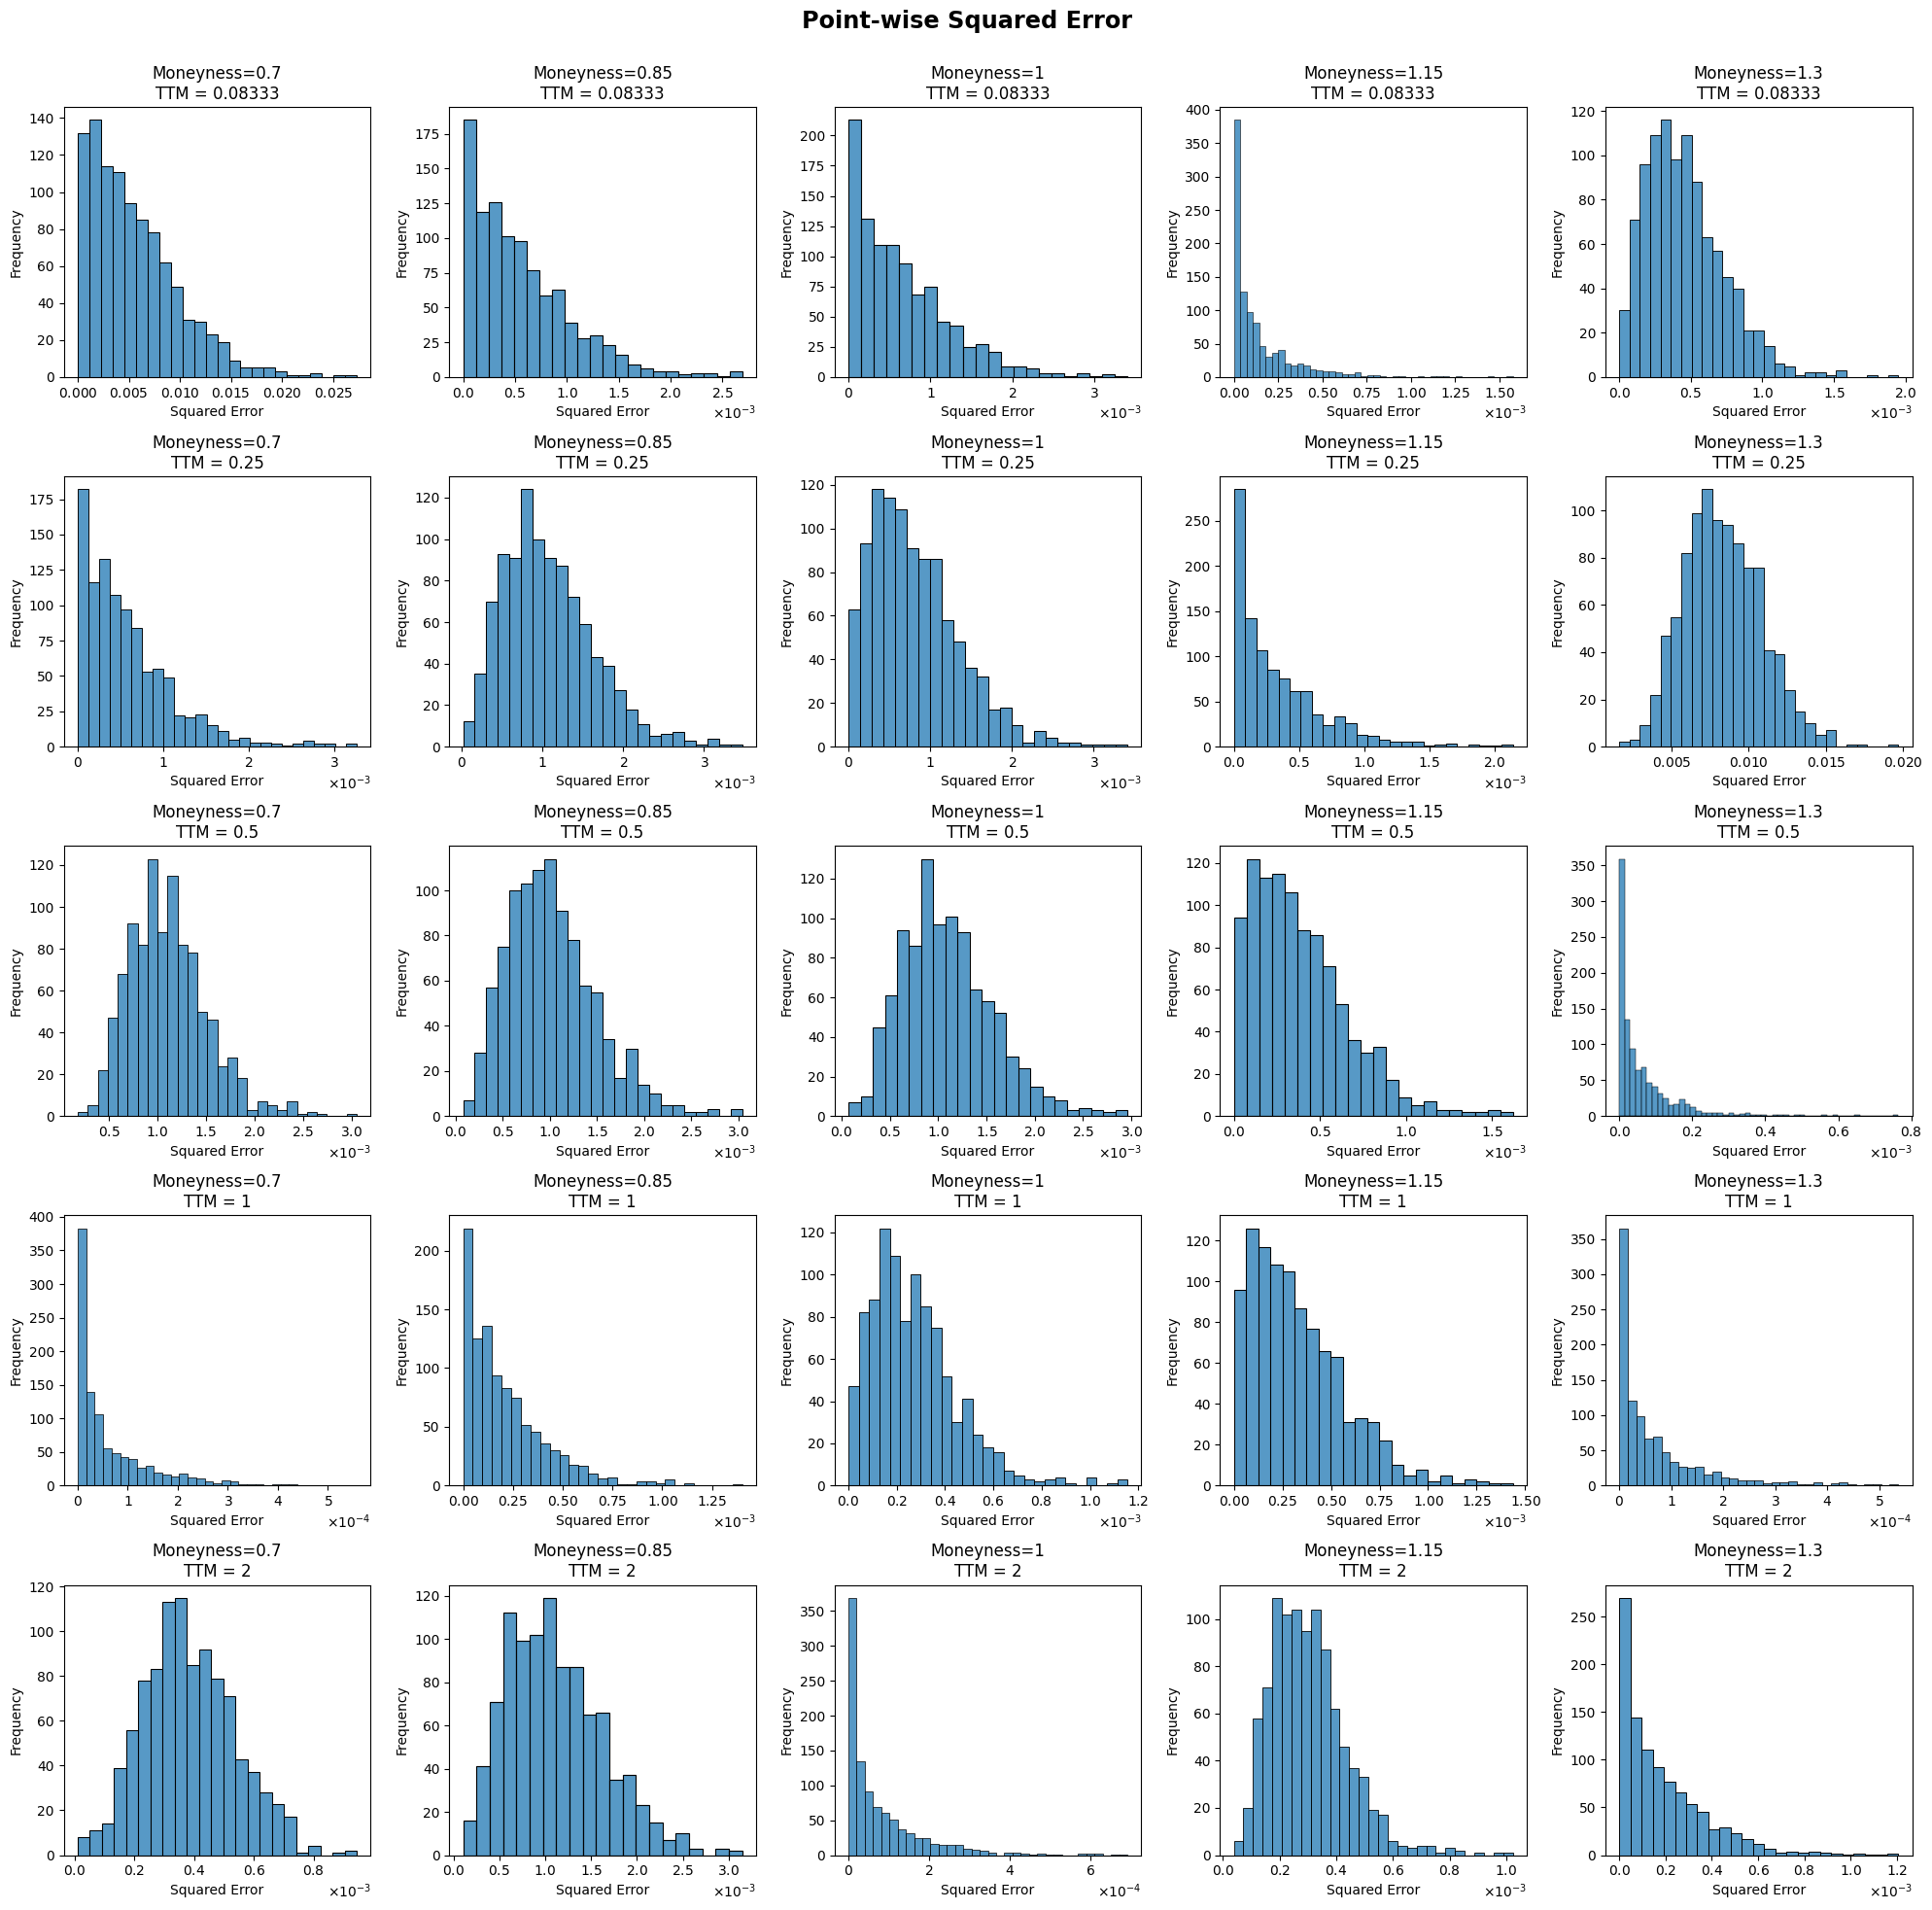

In [10]:
compute_pointwise_error_histogram(vol_surf_data[2000], vae_surf, plot_type="hist")

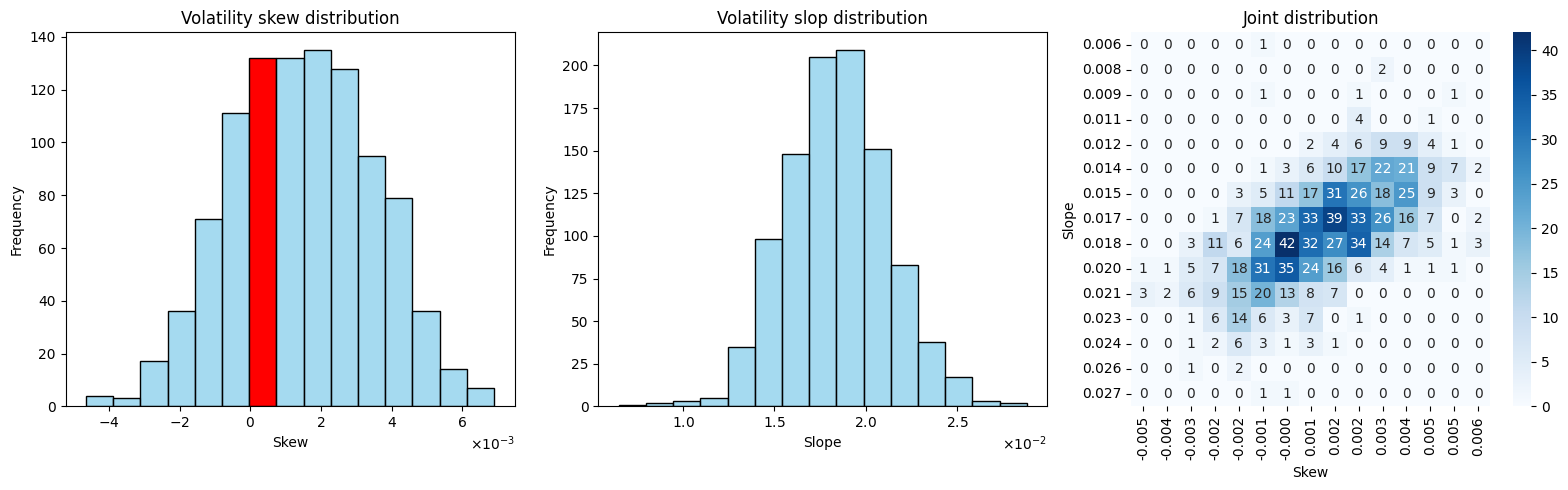

In [11]:
skew_and_slope_metrics(vol_surf_data[2000], vae_surf)

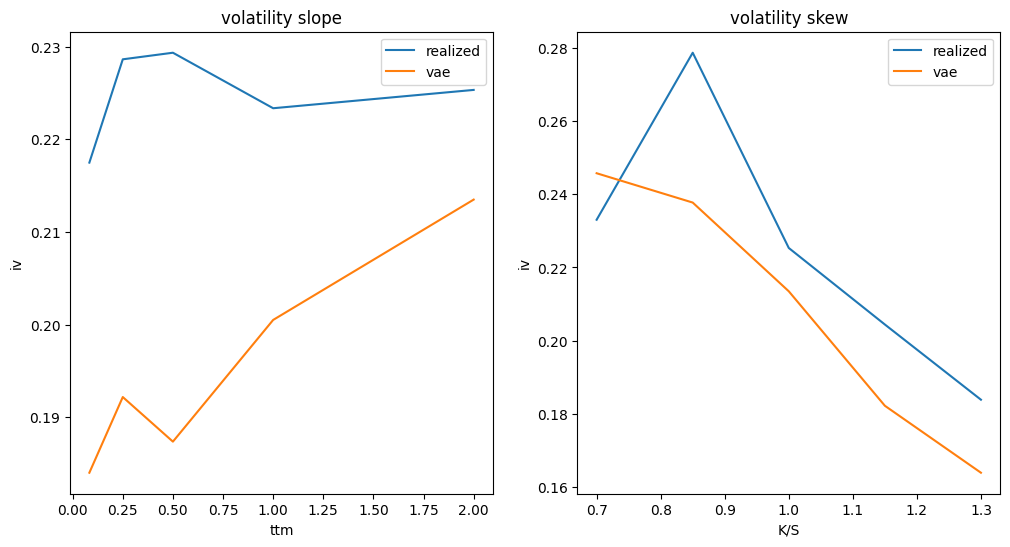

In [13]:
moneyness_grid=[0.7, 0.85, 1, 1.15, 1.3]
ttm_grid=[0.08333, 0.25, 0.5, 1, 2]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(ttm_grid, vol_surf_data[2000, :, 2], label="realized")
ax[0].plot(ttm_grid, vae_surf[0, :, 2], label="vae")
ax[0].legend()
ax[0].set_xlabel("ttm")
ax[0].set_ylabel("iv")
ax[0].set_title("volatility slope")

ax[1].plot(moneyness_grid, vol_surf_data[2000, 3, :], label="realized")
ax[1].plot(moneyness_grid, vae_surf[0, 3, :], label="vae")
ax[1].legend()
ax[1].set_xlabel("K/S")
ax[1].set_ylabel("iv")
ax[1].set_title("volatility skew")
plt.show()